# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [1]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
!pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [4]:
devices_data = pd.read_csv("used_device_data.csv")

## Data Overview

- Observations
- Sanity checks

a. Viewing the first and last few rows of the dataset

In [5]:
devices_data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [5]:
devices_data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


Observation: The data contains categoric (brand_name, os, 4g, 5g),  int (release year and days used) and float (the rest of the columns) data.

b. Checking the shape of the data

In [9]:
devices_data.shape

(3454, 15)

Observation: The data contains 3454 rows and 15 columns

In [10]:
devices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation: 
* There are 9 float columns, 2 int columns and 4 categoric or object variables
* THe data only uses 404+ KB of memory which is small
* A few columns contain null values as evidenced by the total non null count being below 3454

c. Getting the statistical summary of the variables

In [12]:
devices_data.describe().T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


Statistical Observations:
* 50% of all devices have ram of 4GB
* Only 25% of the used devices have battery capacity of more than 4000mAH with the highest being 9720MaH
* The total number of days used has a wide range, spanning from 91days to 1094
* Internal memory for 75% of the used devices does not exceed 64GB. The maximum of 1024 shows the possibility of outliers
* Between 50 and 75% of the used devices fall within the average for each feature. For example screen size average is 13.7 which is between the 50th and 75th quartiles of 12.8 and 15.3 respectively. The same applys for weight with a mean of 182.7 which lies between 160 and 185 as the 50th and 75th quartiles.



## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

## Univariate Analysis

a. Histogram and Boxplot for all numeric features

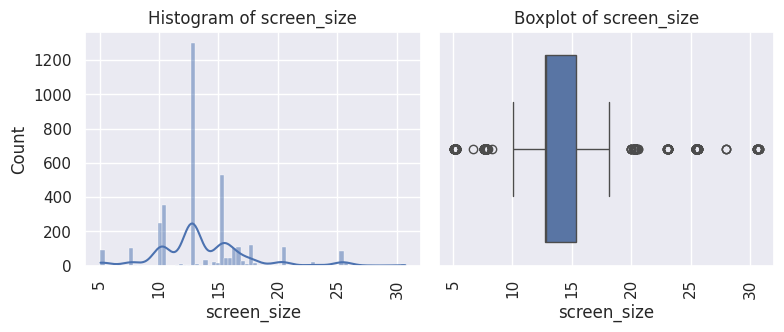

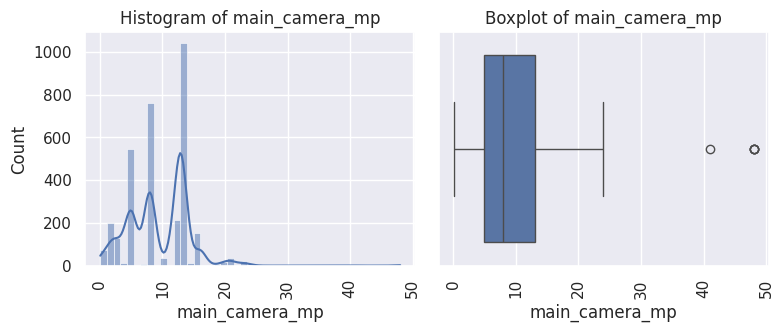

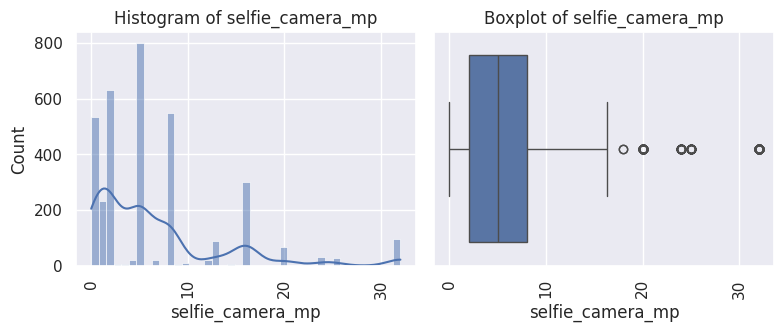

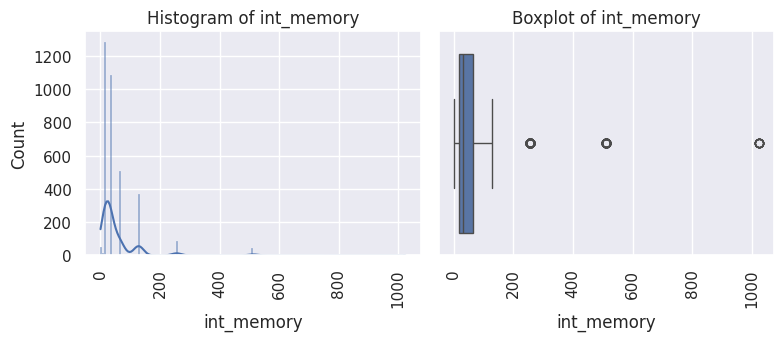

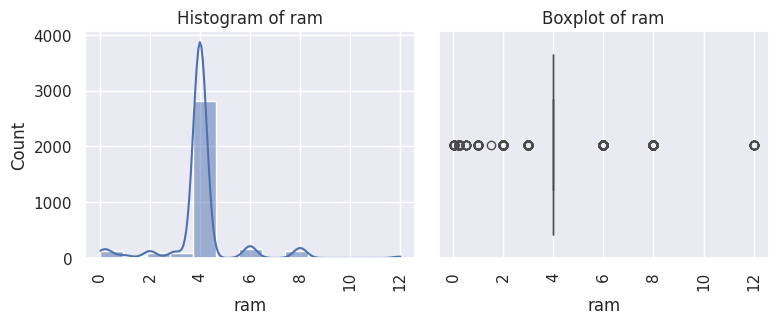

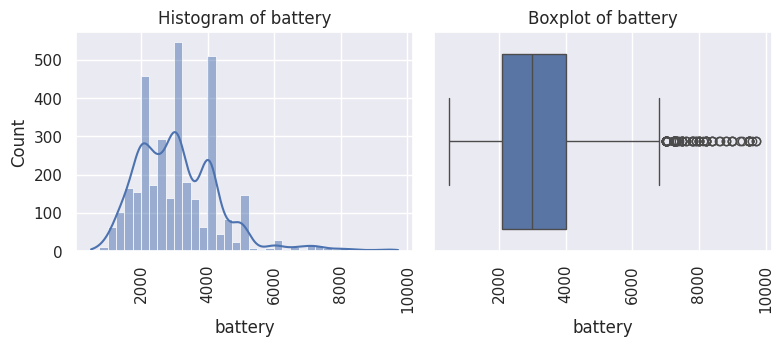

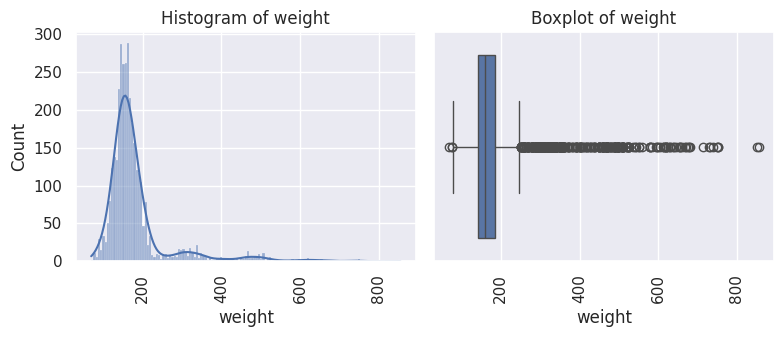

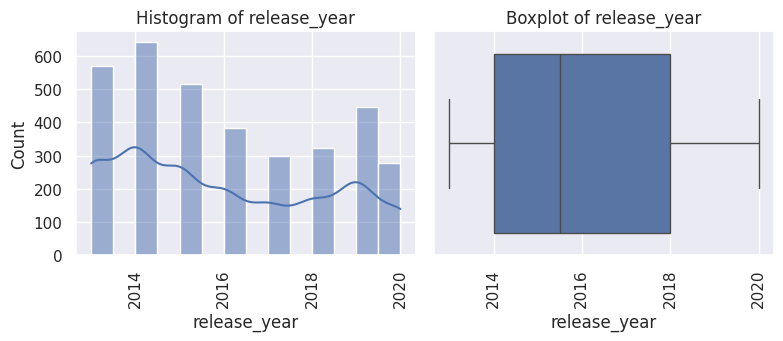

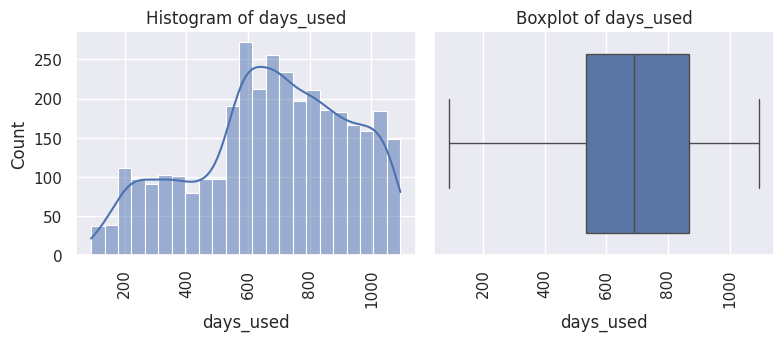

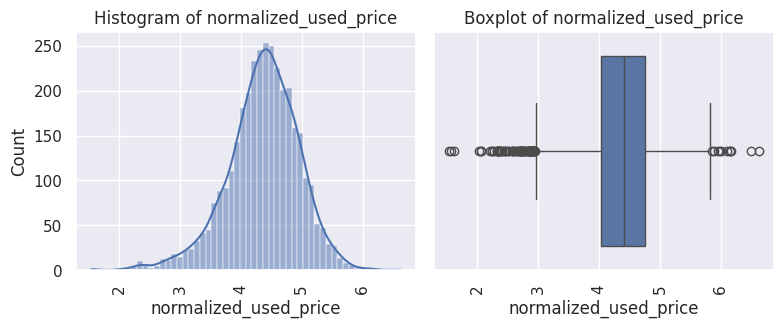

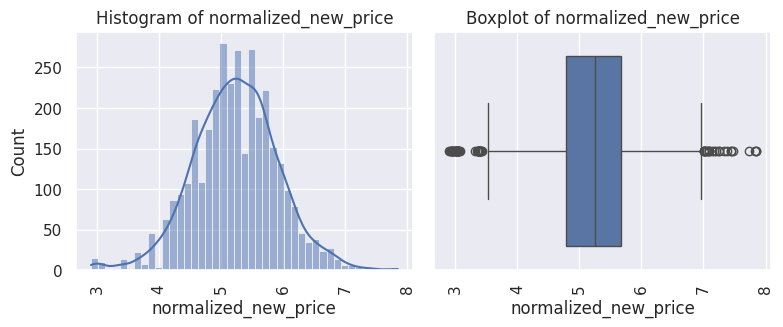

In [18]:
numeric_cols = devices_data.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    
    # Histogram plot
    plt.subplot(2, 2, 1)
    sns.histplot(data=devices_data, x=col, kde=True)
    plt.xticks(rotation=90)
    plt.title(f'Histogram of {col}')
    
    # Boxplot
    plt.subplot(2, 2, 2)
    sns.boxplot(data=devices_data, x=col)
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

Univariate Analysis Observations
1. normalised_used_price and normalized_new_price are almost normally distributed as well as weight and ram
2. All of the features have outliers except for days_used and year released
3. Weight has many outliers skewed to the right.
4. Internal memory has 3 outliers which may need to be looked into.

### Univariate Analysis for all categoric variables

In [67]:
# function to create labeled barplots


def labeled_countplot(data, feature, perc=False, n=None, title=""):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    
    plt.figure(figsize=(15, 6))
   
    

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.title(title)
    plt.show()  # show the plot

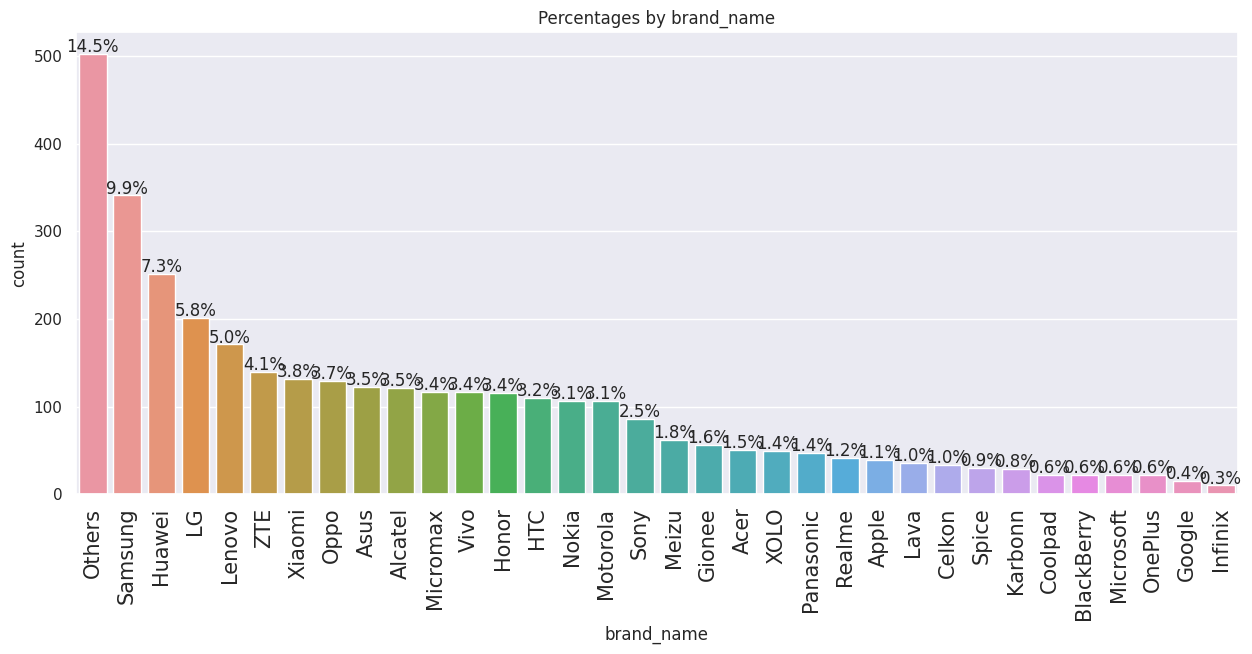

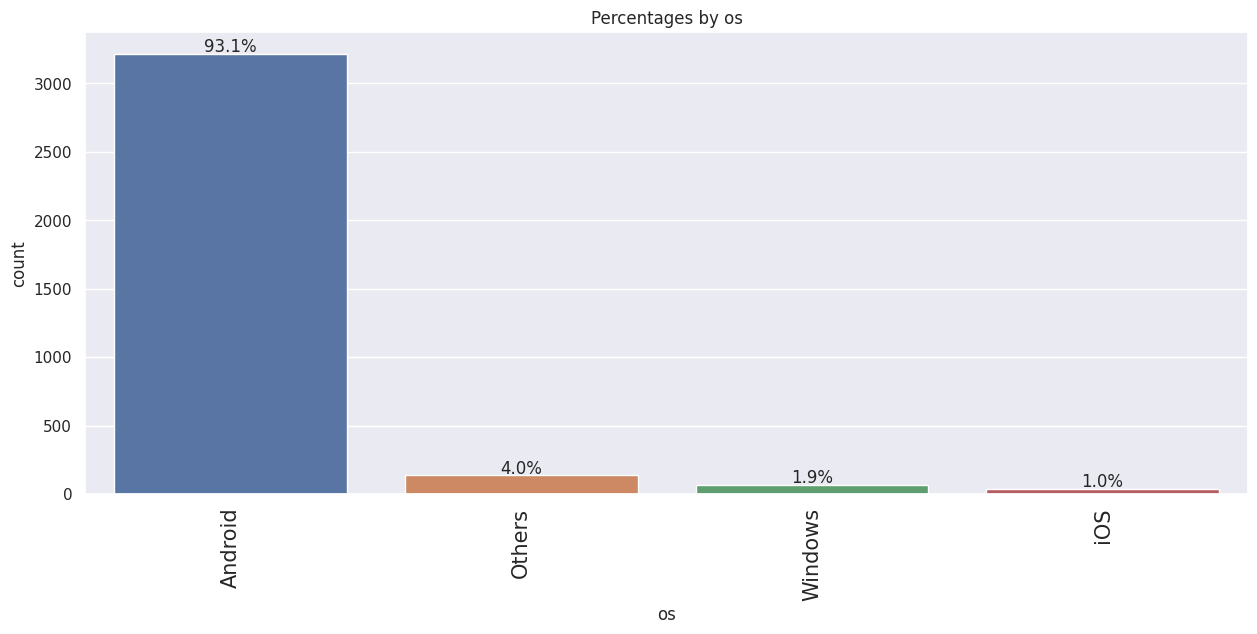

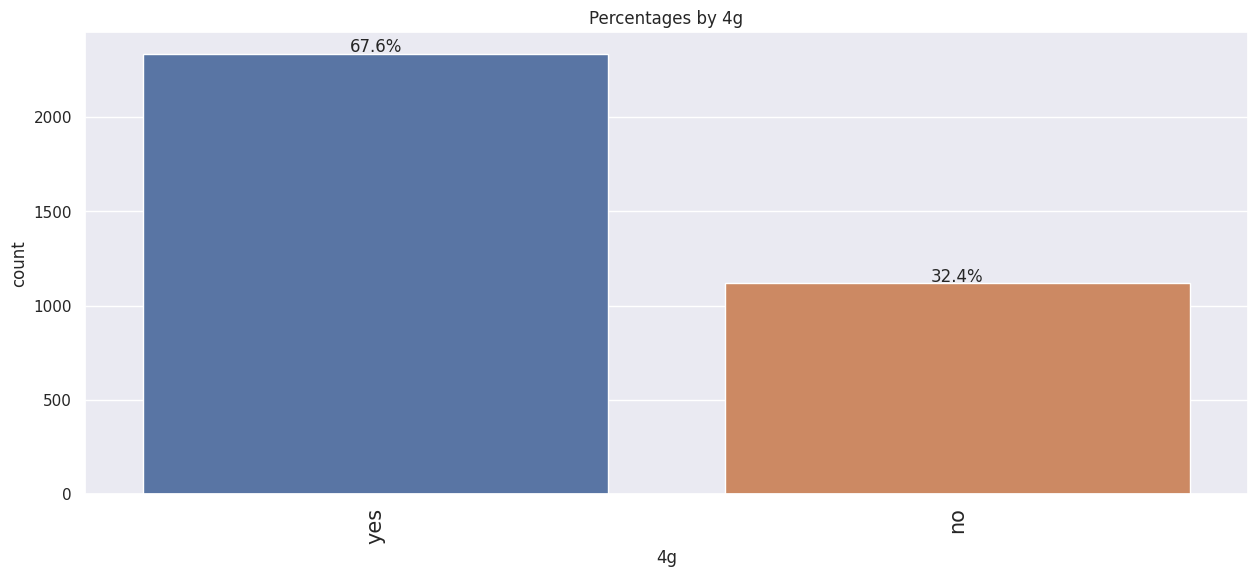

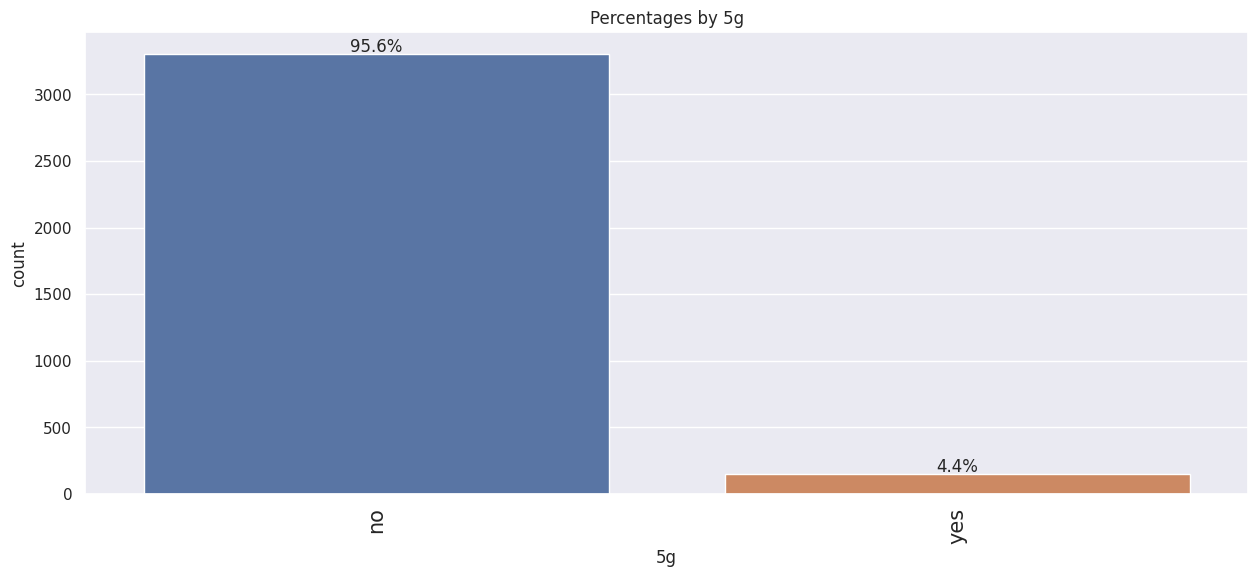

In [68]:
#bar plots of percentages of each categorical feature
object_cols = devices_data.select_dtypes(include='object').columns


for  col in object_cols:   
    labeled_countplot(devices_data, col, True, title=f"Percentages by {col}")

Univariate Analysis of Categoric variables observation:
* The Samsung brand, Android os and 4g used devices do stand out as the most sought after phones
    * Android constitutes 93.1% of all devices
    * Samsung 9.9% with Huwawei slightly behind at 7.3% of the market share
    * 4g 67.6% of the devices
* Used devices with 4g are twice as much as those without
* Significantly few phones (4.4%) have 5g
* iOS and windows devices are not very popular at 1% and 1.9% respectively

### Bivariate Analysis

a. Correlation Check for normalised used price against other variables

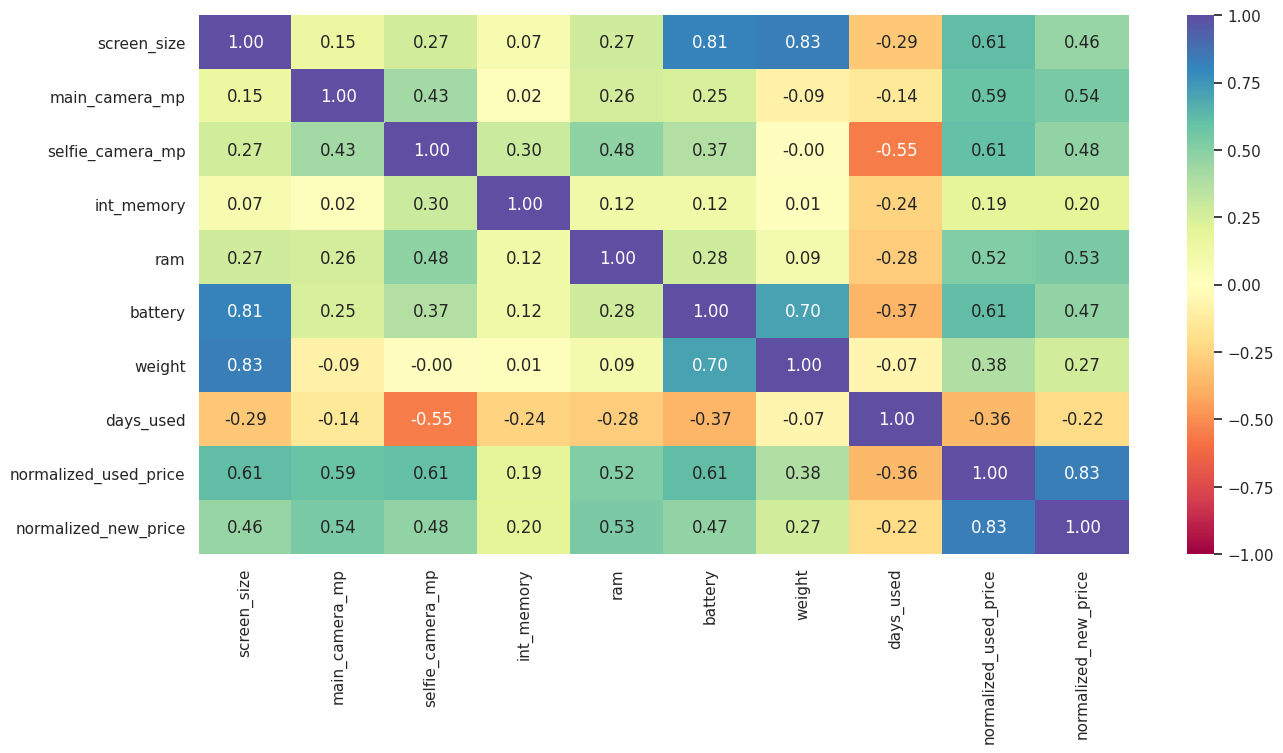

In [8]:
cols_list = devices_data.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    devices_data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Correlation Observation:
1. Three features stand out as the most co-related and need to be noted for potential multicollinerality. 
* Battery and screen_size 
* Weight and screen size
* Battery and weight
2. The normalized_used_price has good co-relation with screen_size, main_camera, selfie_camera, battery and the normalized_new price. 

 c. Ram VS Brand: The amount of RAM is important for the smooth functioning of a device. 

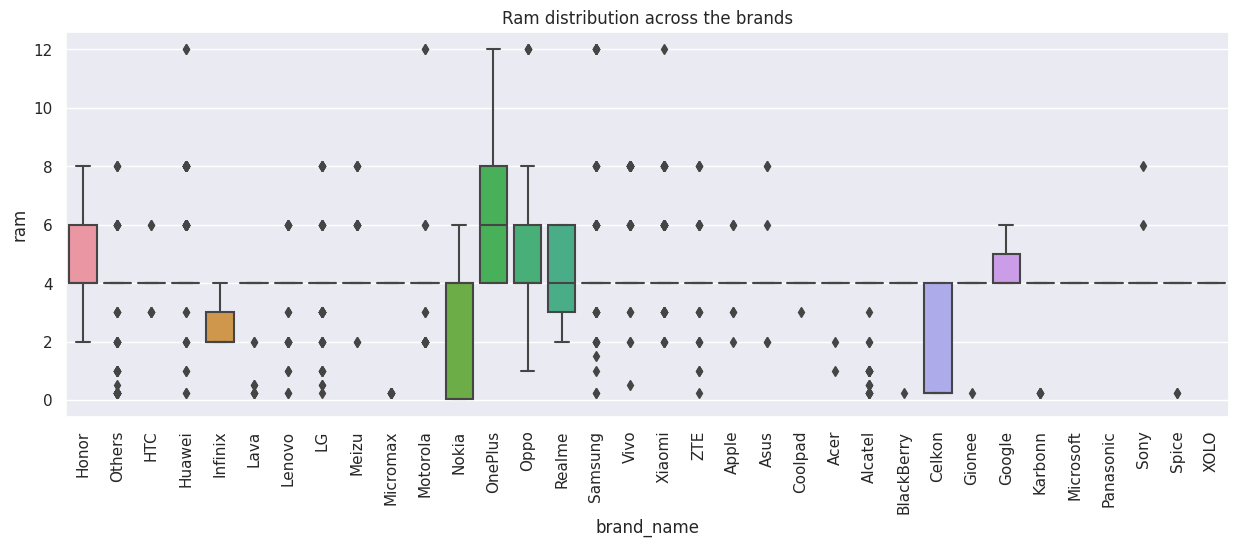

In [54]:
plt.figure(figsize=(15, 5))
plt.title("Ram distribution across the brands")
sns.boxplot(data=devices_data, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

Observation:
* Ram tends to be the same across all brands for all devices at 4GB
* Oneplus brand is inclined towards more RAM having a minimum cap of 4 and maximum of 12.
* The Celkon and Infinix brands on the other hand are inclined towards less RAM with a maximum of 4GB.
* The memory range for Google and infinix are the smallest of only 2GB while Huawei and Samsung offer a wide range from 0GB to 12GB of ram

d. weight distribution for phones and tablets offering large batteries (more than 4500 mAh)

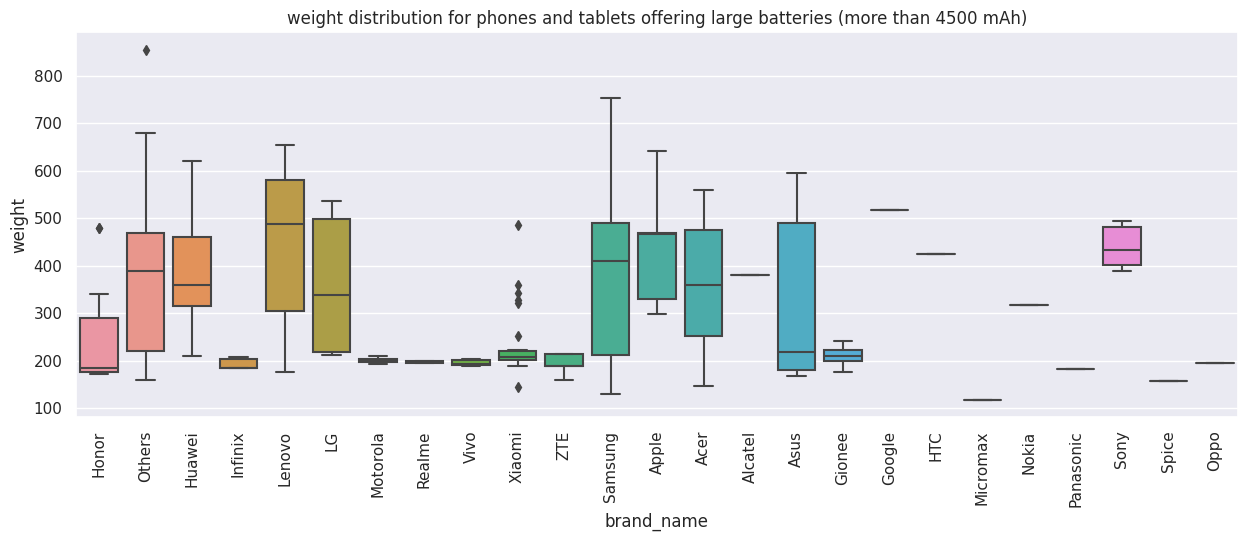

In [53]:
##  boxplot for 'brand_name' vs 'weight'
df_large_battery = devices_data[devices_data.battery > 4500]

plt.figure(figsize=(15, 5))
plt.title("weight distribution for phones and tablets offering large batteries (more than 4500 mAh)")
sns.boxplot(data=df_large_battery, x="brand_name", y="weight") 
plt.xticks(rotation=90)
plt.show()

Observation:
* There is no uniformity in the variation of weight among the different brands for higher battery capacity.
* Some brands have the same weight (HTC, Google, Nokia etc). Other brand names have very small weight range (Motorolla, ZTE, Vivo etc) while the rest have significantly large weight range (Samsung, Lenovo, Asus, LG etc)

e. Number of phones and tablets across different brands with a screen size larger than 6 inches

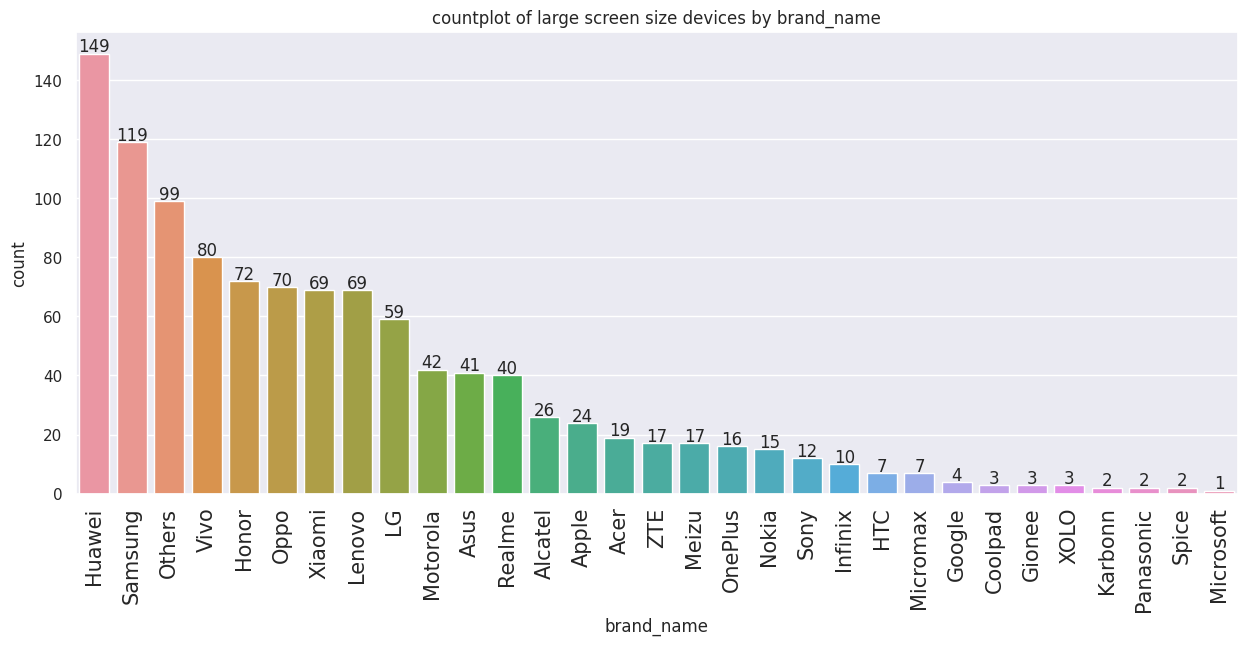

In [52]:
# 
df_large_screen = devices_data[devices_data.screen_size > 6 * 2.54]# convert 6inches to cms since screen size is in cm

#countplot of large screen size devices by brand_name
labeled_countplot(df_large_screen, 'brand_name', False, title="countplot of large screen size devices by brand_name")

Observation
* Huwawei (149) and Samsung(119) have the largest number of large screen size used devices on the market
* Other top contenders are Vivo, Oppo, Lenovo and Xiaomi

f. distribution of devices offering good selfie and main cameras across brands

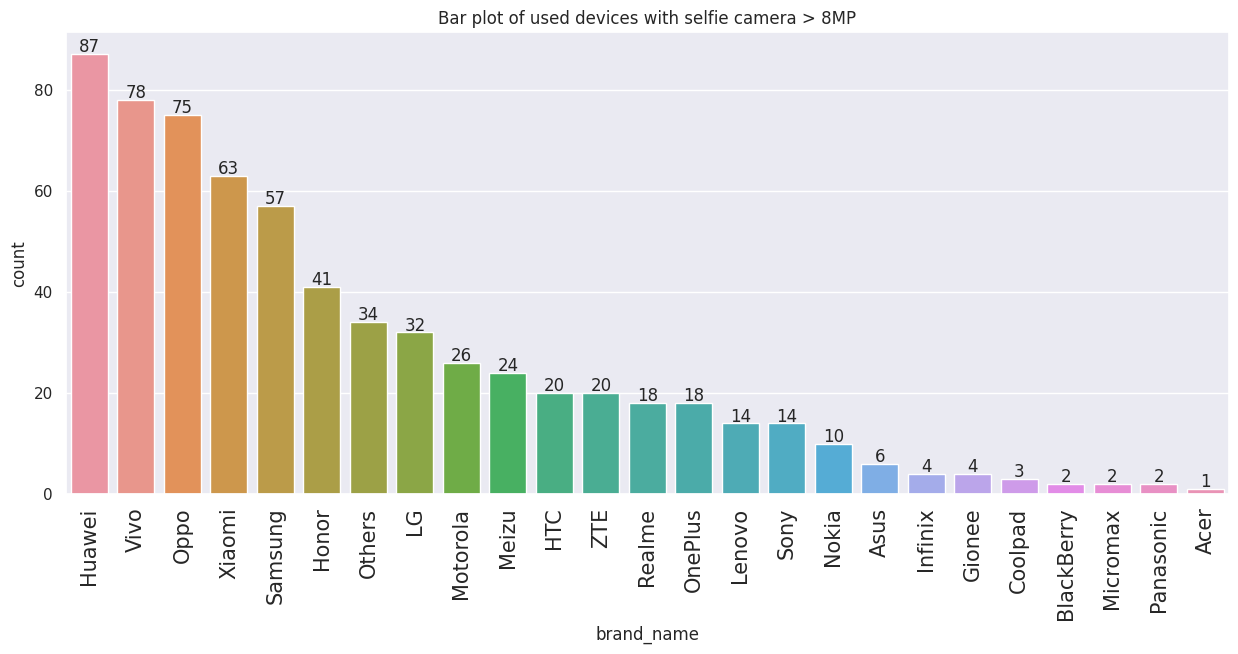

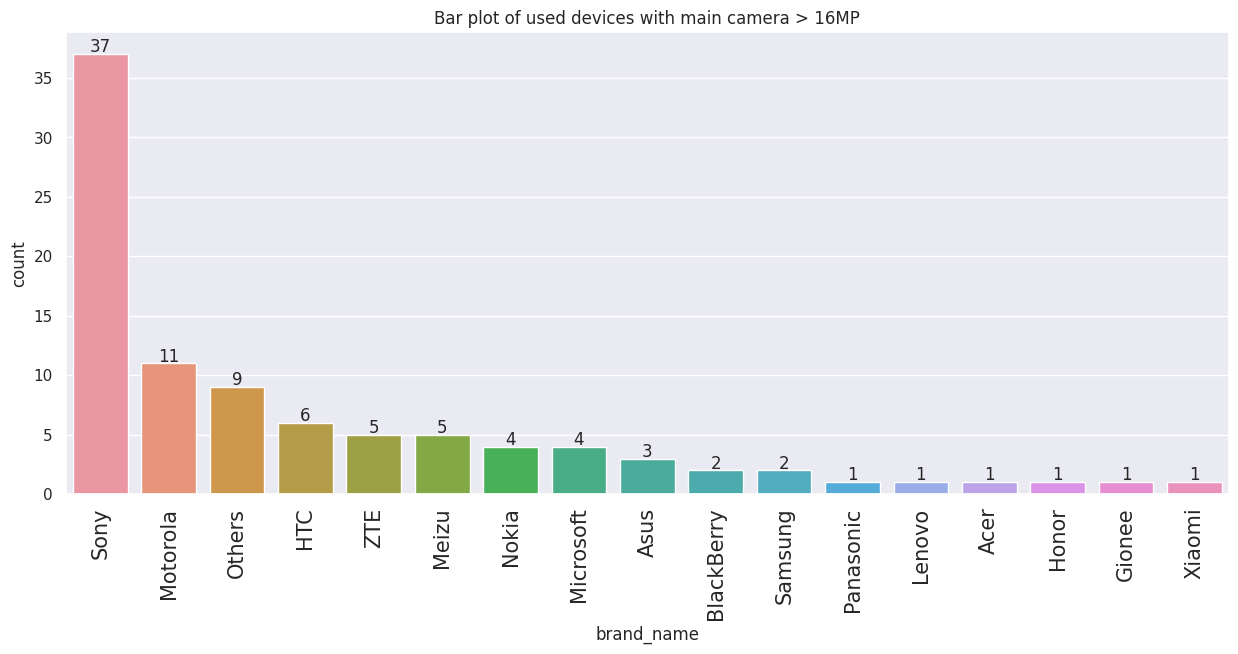

In [48]:
# data for good selfie cameras
df_selfie_camera = devices_data[devices_data.selfie_camera_mp > 8]

#countplot of good selfie camera devices by brand_name
labeled_countplot(df_selfie_camera, 'brand_name', False, title="Bar plot of used devices with selfie camera > 8MP")

#countplot of good main camera devices by brand_name
df_main_camera = devices_data[devices_data.main_camera_mp > 16]
labeled_countplot(df_main_camera, 'brand_name', False, title="Bar plot of used devices with main camera > 16MP")

Observation:
* Huawei, Sony and Vivo brands have the most number of great selfie cameras
* Sony has the most number of great main camera devices which is 37
* While Samsung is the most popular phone, it does not have the best of the cameras

g. Price distribution across the years


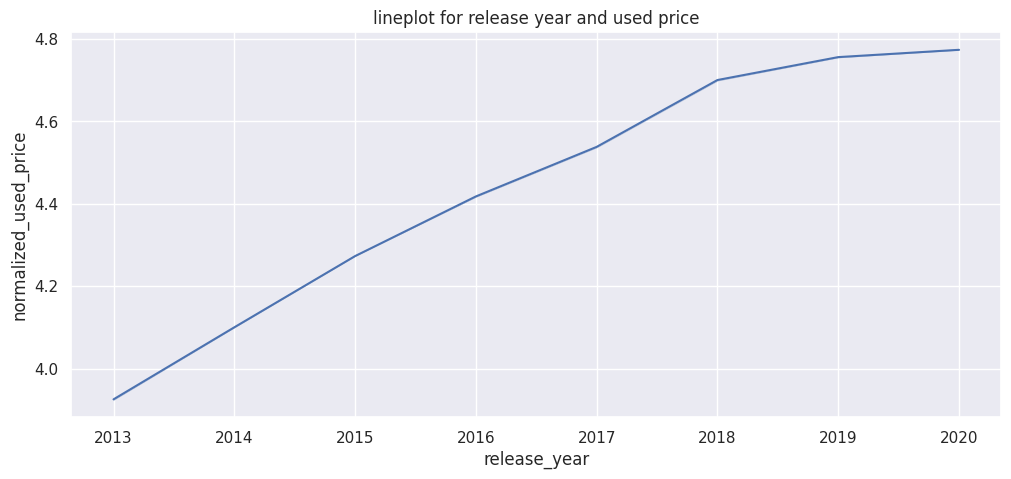

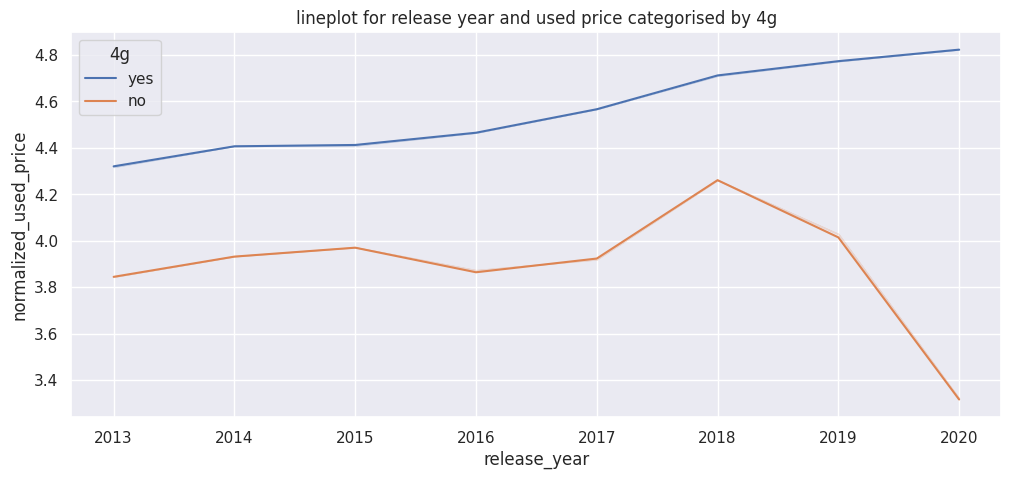

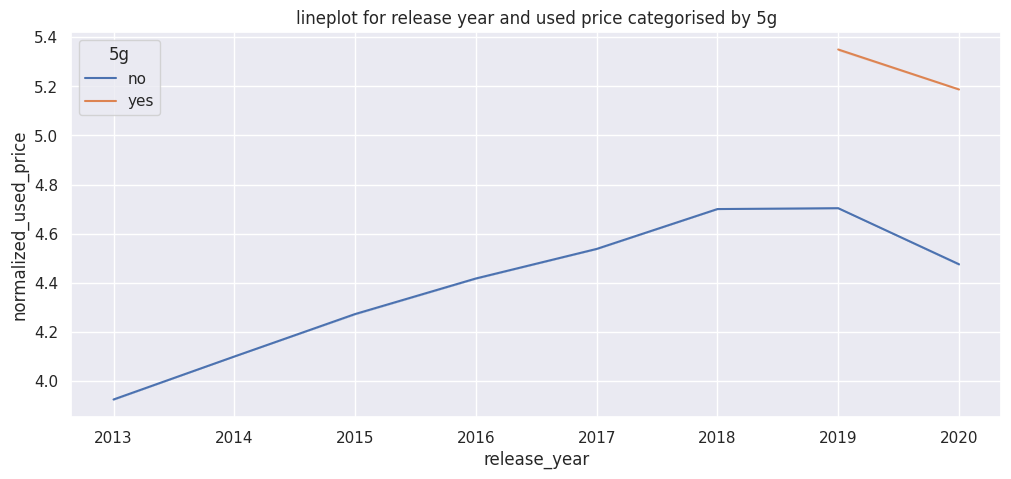

In [70]:
plt.figure(figsize=(12, 5))
## lineplot for release year and used price
plt.title("lineplot for release year and used price")
sns.lineplot(data=devices_data, y="normalized_used_price", x="release_year", ci=False) 
plt.show()

## lineplot for release year and used price categorised by 4g
plt.figure(figsize=(12, 5))
plt.title("lineplot for release year and used price categorised by 4g")
sns.lineplot(data=devices_data, y="normalized_used_price", x="release_year", hue="4g", ci=False)
plt.show()

## lineplot for release year and used price categorised by 5g
plt.figure(figsize=(12, 5))
plt.title("lineplot for release year and used price categorised by 5g")
sns.lineplot(data=devices_data, y="normalized_used_price", x="release_year", hue="5g", ci=False)
plt.show()

Observation:
* Generally, the price of used devices has been increasing since 2013
* While phones with 4g have been steadily increasing the price, those without 4g have experienced a sharp decline in price since 2018.
* With regards to 5g, the price for used devices has been on the decrease wether the phone has 5g or not. 

h. Price comparison between 4g and 5g

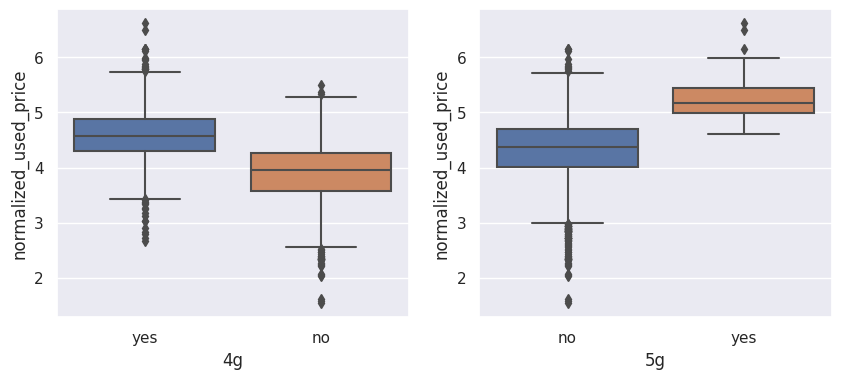

In [51]:
plt.figure(figsize=(10, 4))

#Box plot for normalised used prize against 4g
plt.subplot(121)
sns.boxplot(data=devices_data, x="4g", y="normalized_used_price")

#Box plot for normalised used prize against 5g
plt.subplot(122)
sns.boxplot(data=devices_data, x="5g", y="normalized_used_price")

plt.show()

Observation:
On average, phones with 5g are the most expensive while phones without 4g are the least costly

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### a. Missing Value Treatment
* Check for any missing vaues

In [71]:
devices_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation: There are columns whose count is less than the total 3454 observed earlier

In [72]:
devices_data.isna().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation: 
* A total of 6columns have missing data.
* Considering the total number of missing columns is small, these can be treated by imputing median for each feature

In [74]:
# create a copy of the data for manipulation
df = devices_data.copy()

In [75]:
# list of columns to treat missing data
missing_cols = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]
## for each column, impute missing values in cols_impute median by grouping the data on release year and brand name
for col in missing_cols:
    df[col] = df[col].fillna(
        value=df.groupby(['release_year', 'brand_name'])[col].transform("median")
    )   
# checking for missing values
df.isna().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observation:
* There still 4 more columns. 
* We do this again grouping by `brand_name` only since some years do not exist in our data set

In [76]:
# list of columns to treat missing data
missing_cols = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]
## for each column, impute missing values in cols_impute median by grouping the data on brand name
for col in missing_cols:
    df[col] = df[col].fillna(
        value=df.groupby('brand_name')[col].transform("median")
    )   
# checking for missing values
df.isna().sum() 

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

Observation:
* `main_camera_mp` is the only one left
* This will be fill in by the column median.

In [77]:
 ## impute the data with median
df["main_camera_mp"] = df["main_camera_mp"].fillna(df["main_camera_mp"].median())

# checking for missing values
df.isna().sum() 

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

Observation:
* All columns have been treated for missing values.

## EDA
* We will now check our data again for sanity

- It is a good idea to explore the data once again after manipulating it.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

Observation:
* Non null count shows there are no missing values
* There are 9 floats, 2 ints and 4 objects
* Memory usage is still small at 404KB

## Model Building - Linear Regression

## Model Performance Check

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

## Final Model

## Actionable Insights and Recommendations

-


___